In [1]:
import pandas as pd
import numpy as np 
from scipy.stats import mode 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix 
  
%matplotlib inline

In [2]:
df=pd.read_csv(r"C:\Users\Aditi\Downloads\Hackman_final_dataSet.csv")

In [3]:
df.head()

,Fever,exposure_rain,travel_history,weather_change,water_change,cold_cough,runny_nose,abdominal_pain,loose_stools,vommitting,...,chills,sweats,sore_eyes,contaminated_food,contaminated_water,bloating,loss_of_appetite,over_eaten,more_than3_days,prediction
0,1,1,0,0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,Common Fever
1,1,0,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,Common Fever
2,1,0,0,1,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,Common Fever
3,1,0,1,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Common Fever
4,1,0,0,1,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,Common Fever


In [4]:
#treating null values. make nan=0
df.isnull().sum()

Fever                 0
exposure_rain         0
travel_history        0
weather_change        0
water_change          0
cold_cough            0
runny_nose            0
abdominal_pain        0
loose_stools          0
vommitting            0
diarreha              0
blood_stools          0
rashes                0
dry_mouth             0
dehydration           0
mosquito_area         0
contact_person        0
throat_pain           1
joint_pain            0
body_pain             0
back_pain             0
weakness              0
tiredness             0
headaches             0
chills                0
sweats                0
sore_eyes             0
contaminated_food     0
contaminated_water    0
bloating              0
loss_of_appetite      0
over_eaten            0
more_than3_days       0
prediction            0
dtype: int64

In [5]:
mcols=(df.columns[:-1])

In [6]:

for col in mcols:
    #mod = df[col].mode
    df.fillna(value=0, inplace=True)

In [7]:
df.head() 

,Fever,exposure_rain,travel_history,weather_change,water_change,cold_cough,runny_nose,abdominal_pain,loose_stools,vommitting,...,chills,sweats,sore_eyes,contaminated_food,contaminated_water,bloating,loss_of_appetite,over_eaten,more_than3_days,prediction
0,1,1,0,0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,Common Fever
1,1,0,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,Common Fever
2,1,0,0,1,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,Common Fever
3,1,0,1,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Common Fever
4,1,0,0,1,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,Common Fever


In [8]:
df.isna().sum()

Fever                 0
exposure_rain         0
travel_history        0
weather_change        0
water_change          0
cold_cough            0
runny_nose            0
abdominal_pain        0
loose_stools          0
vommitting            0
diarreha              0
blood_stools          0
rashes                0
dry_mouth             0
dehydration           0
mosquito_area         0
contact_person        0
throat_pain           0
joint_pain            0
body_pain             0
back_pain             0
weakness              0
tiredness             0
headaches             0
chills                0
sweats                0
sore_eyes             0
contaminated_food     0
contaminated_water    0
bloating              0
loss_of_appetite      0
over_eaten            0
more_than3_days       0
prediction            0
dtype: int64

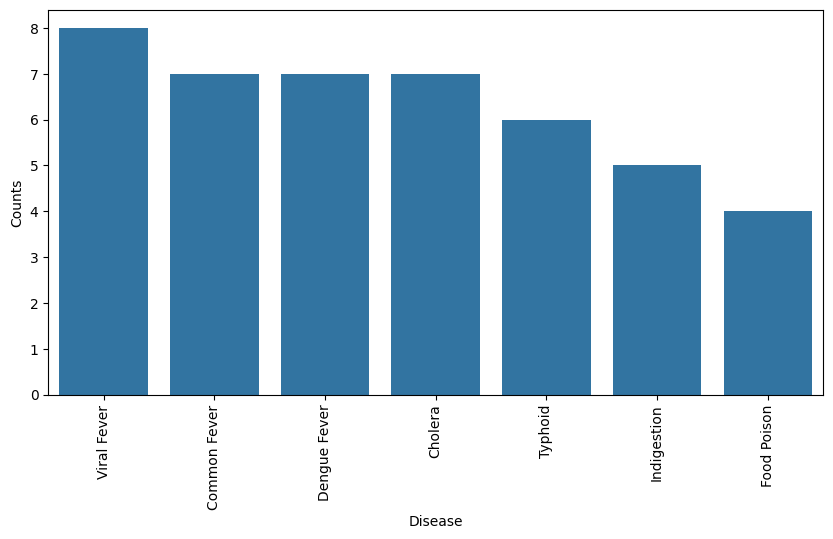

In [9]:
# Checking whether the dataset is balanced or not 
disease_counts = df["prediction"].value_counts() 
temp_df = pd.DataFrame({ 
    "Disease": disease_counts.index, 
    "Counts": disease_counts.values 
}) 
  
plt.figure(figsize = (10,5)) 
sns.barplot(x = "Disease", y = "Counts", data = temp_df) 
plt.xticks(rotation=90) 
plt.show()

In [10]:
df['prediction'].value_counts()

prediction
Viral Fever     8
Common Fever    7
Dengue Fever    7
Cholera         7
Typhoid         6
Indigestion     5
Food Poison     4
Name: count, dtype: int64

In [11]:
# Encoding the target value into numerical 
# value using LabelEncoder 
encoder = LabelEncoder() 
df["prediction"] = encoder.fit_transform(df["prediction"]) 


In [12]:
df.head()

,Fever,exposure_rain,travel_history,weather_change,water_change,cold_cough,runny_nose,abdominal_pain,loose_stools,vommitting,...,chills,sweats,sore_eyes,contaminated_food,contaminated_water,bloating,loss_of_appetite,over_eaten,more_than3_days,prediction
0,1,1,0,0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,1,0,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,1,0,0,1,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,1,0,1,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,1,0,0,1,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [13]:
X = df.iloc[:,:-1] #all rows n cols excl the last col(target var)
y = df.iloc[:, -1] #target var col
X_train, X_test, y_train, y_test =train_test_split( 
X, y, test_size = 0.2, random_state = 24) 

print(f"Train: {X_train.shape}, {y_train.shape}") 
print(f"Test: {X_test.shape}, {y_test.shape}")


Train: (35, 33), (35,)
Test: (9, 33), (9,)


In [14]:
# Defining scoring metric for k-fold cross validation 
def cv_scoring(estimator, X, y): 
	return accuracy_score(y, estimator.predict(X)) 

# Initializing Models 
models = { 
	"SVC":SVC(), 
	"Gaussian NB":GaussianNB(), 
	"Random Forest":RandomForestClassifier(random_state=18) 
} 

# Producing cross validation score for the models 
for model_name in models: 
	model = models[model_name] 
	scores = cross_val_score(model, X, y, cv = 2, n_jobs = -1, scoring = cv_scoring) 
	print("=="*30) 
	print(model_name) 
	print(f"Scores: {scores}") 
	print(f"Mean Score: {np.mean(scores)}")


SVC
Scores: [0.95454545 1.        ]
Mean Score: 0.9772727272727273
Gaussian NB
Scores: [0.95454545 0.95454545]
Mean Score: 0.9545454545454546
Random Forest
Scores: [0.95454545 0.95454545]
Mean Score: 0.9545454545454546


Accuracy on train data by SVM Classifier\ : 100.0
Accuracy on test data by SVM Classifier\ : 100.0


<>:6: SyntaxWarning: invalid escape sequence '\ '
<>:8: SyntaxWarning: invalid escape sequence '\ '
<>:19: SyntaxWarning: invalid escape sequence '\ '
<>:21: SyntaxWarning: invalid escape sequence '\ '
<>:32: SyntaxWarning: invalid escape sequence '\ '
<>:34: SyntaxWarning: invalid escape sequence '\ '
<>:6: SyntaxWarning: invalid escape sequence '\ '
<>:8: SyntaxWarning: invalid escape sequence '\ '
<>:19: SyntaxWarning: invalid escape sequence '\ '
<>:21: SyntaxWarning: invalid escape sequence '\ '
<>:32: SyntaxWarning: invalid escape sequence '\ '
<>:34: SyntaxWarning: invalid escape sequence '\ '
C:\Users\Aditi\AppData\Local\Temp\ipykernel_15200\523038905.py:6: SyntaxWarning: invalid escape sequence '\ '
  print(f"Accuracy on train data by SVM Classifier\ : {accuracy_score(y_train, svm_model.predict(X_train))*100}")
C:\Users\Aditi\AppData\Local\Temp\ipykernel_15200\523038905.py:8: SyntaxWarning: invalid escape sequence '\ '
  print(f"Accuracy on test data by SVM Classifier\ : {accu

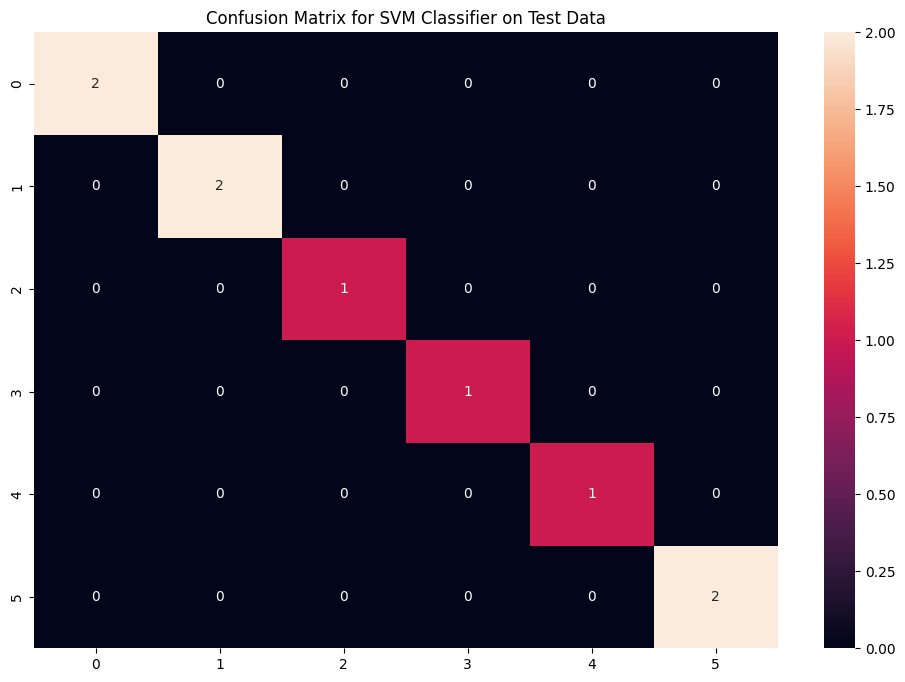

Accuracy on train data by Naive Bayes Classifier\ : 100.0
Accuracy on test data by Naive Bayes Classifier\ : 100.0


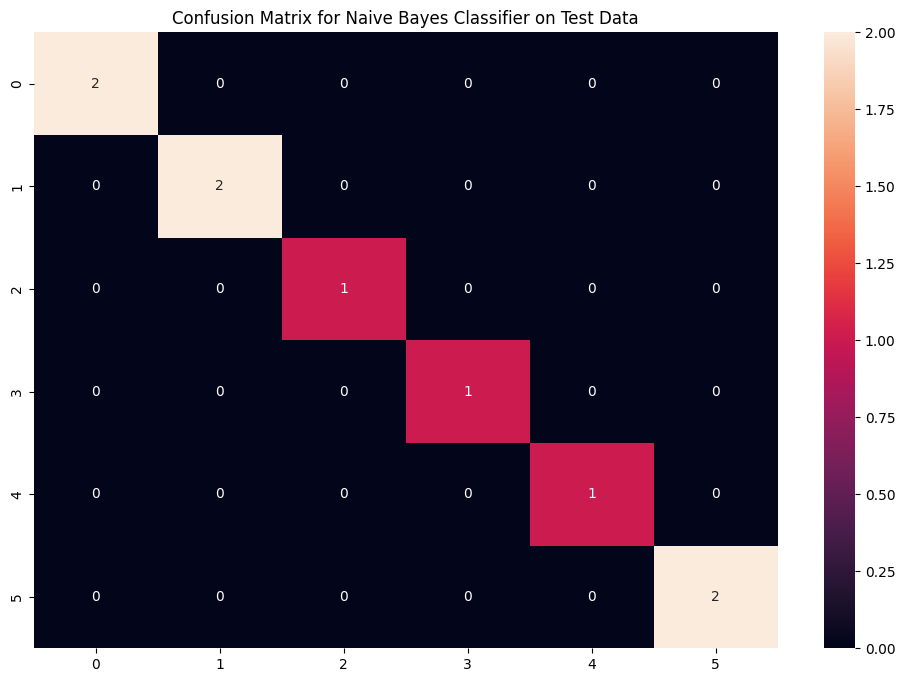

Accuracy on train data by Random Forest Classifier\ : 100.0
Accuracy on test data by Random Forest Classifier\ : 100.0


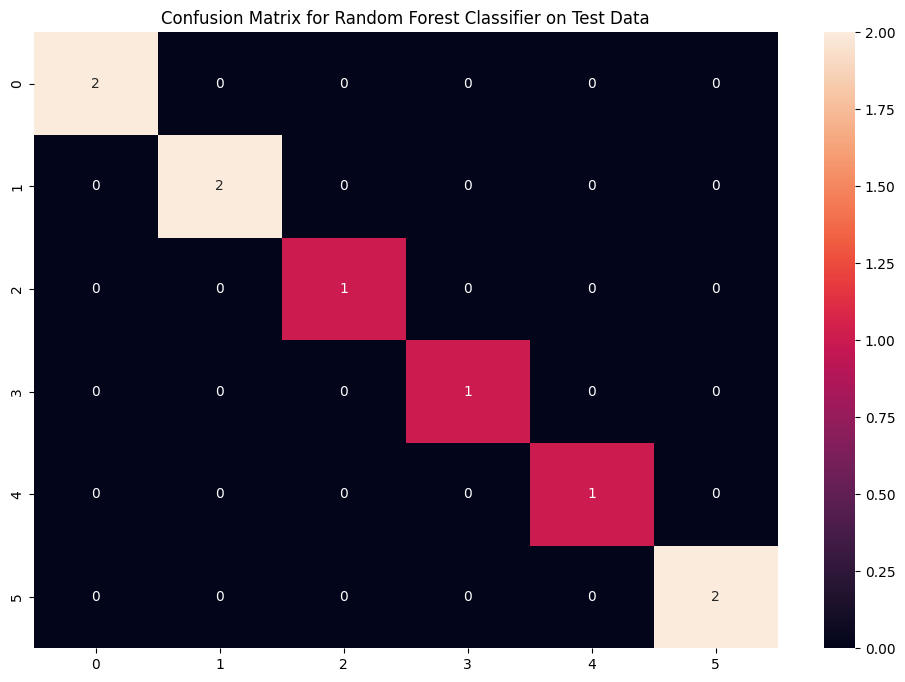

In [15]:
# Training and testing SVM Classifier 
svm_model = SVC() 
svm_model.fit(X_train, y_train) 
preds = svm_model.predict(X_test) 

print(f"Accuracy on train data by SVM Classifier\ : {accuracy_score(y_train, svm_model.predict(X_train))*100}") 

print(f"Accuracy on test data by SVM Classifier\ : {accuracy_score(y_test, preds)*100}") 
cf_matrix = confusion_matrix(y_test, preds) 
plt.figure(figsize=(12,8)) 
sns.heatmap(cf_matrix, annot=True) 
plt.title("Confusion Matrix for SVM Classifier on Test Data") 
plt.show() 

# Training and testing Naive Bayes Classifier 
nb_model = GaussianNB() 
nb_model.fit(X_train, y_train) 
preds = nb_model.predict(X_test) 
print(f"Accuracy on train data by Naive Bayes Classifier\ : {accuracy_score(y_train, nb_model.predict(X_train))*100}") 

print(f"Accuracy on test data by Naive Bayes Classifier\ : {accuracy_score(y_test, preds)*100}") 
cf_matrix = confusion_matrix(y_test, preds) 
plt.figure(figsize=(12,8)) 
sns.heatmap(cf_matrix, annot=True) 
plt.title("Confusion Matrix for Naive Bayes Classifier on Test Data") 
plt.show() 

# Training and testing Random Forest Classifier 
rf_model = RandomForestClassifier(random_state=18) 
rf_model.fit(X_train, y_train) 
preds = rf_model.predict(X_test) 
print(f"Accuracy on train data by Random Forest Classifier\ : {accuracy_score(y_train, rf_model.predict(X_train))*100}") 

print(f"Accuracy on test data by Random Forest Classifier\ : {accuracy_score(y_test, preds)*100}") 

cf_matrix = confusion_matrix(y_test, preds) 
plt.figure(figsize=(12,8)) 
sns.heatmap(cf_matrix, annot=True) 
plt.title("Confusion Matrix for Random Forest Classifier on Test Data") 
plt.show()


<Axes: >

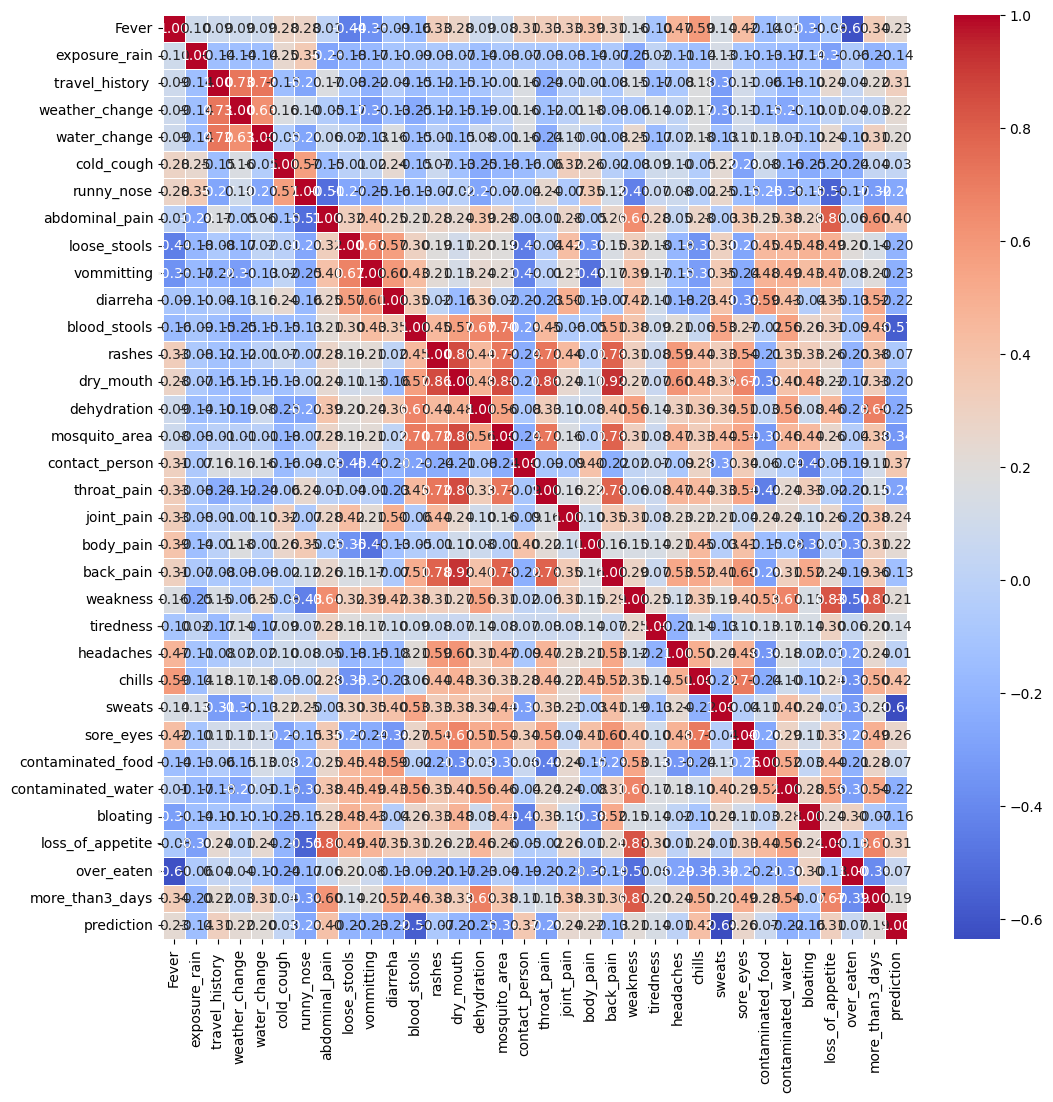

In [16]:
cm = df.corr()

plt.figure(figsize=(12, 12))
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)


In [18]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

new_data=[[1,0,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1]]
#warnings.filterwarnings("ignore", category=DeprecationWarning)

# Assuming you have a list of feature names from the original data
feature_names = X.columns.tolist()
# Create a DataFrame with the correct feature names
new_data_df = pd.DataFrame(new_data, columns=feature_names)

# Model predictions
svm_pred = svm_model.predict(new_data_df)
rf_pred = rf_model.predict(new_data_df)
nb_pred = nb_model.predict(new_data_df)

l=[]
for i in [svm_pred,rf_pred,nb_pred]:
    disease_name = encoder.inverse_transform(i)# Convert the numerical prediction to the disease name
    print(disease_name)
    l.append(disease_name[0])
print(l)
disease_name = pd.DataFrame(l).mode().iloc[0, 0]
print(disease_name)

['Typhoid']
['Typhoid']
['Typhoid']
['Typhoid', 'Typhoid', 'Typhoid']
Typhoid


In [19]:
#a text file
with open("disease_output.txt", "w") as file:
    file.write(disease_name)
